<a href="https://colab.research.google.com/github/aditisinha427/Parameter-Optimization-using-SVM/blob/main/SVMcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.8 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def load_dataset():
    # Example dataset: Wine Quality dataset (multi-class problem)
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    data = pd.read_csv(url, delimiter=";")
    return data

In [ ]:
def create_samples(data):
    samples = []
    for i in range(10):  # Create 10 random samples
        train, test = train_test_split(data, test_size=0.3, random_state=i)
        samples.append((train, test))
    return samples

In [ ]:
def objective(trial, X_train, y_train, X_test, y_test):
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])
    nu = trial.suggest_float("nu", 0.1, 1.0)
    epsilon = trial.suggest_float("epsilon", 0.1, 1.0)

    # Create and train the SVM
    model = SVR(kernel=kernel, C=nu, epsilon=epsilon)
    model.fit(X_train, y_train)

    # Evaluate on the test set
    predictions = model.predict(X_test)
    error = mean_squared_error(y_test, predictions)
    return error

In [ ]:
def optimize_svm(X_train, y_train, X_test, y_test):
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)
    return study

In [ ]:
def optimize_all_samples(samples):
    results = []
    best_sample = None
    best_accuracy = float('inf')
    best_study = None

    for i, (train, test) in enumerate(samples):
        X_train = train.iloc[:, :-1]
        y_train = train.iloc[:, -1]
        X_test = test.iloc[:, :-1]
        y_test = test.iloc[:, -1]

        study = optimize_svm(X_train, y_train, X_test, y_test)
        best_trial = study.best_trial
        accuracy = best_trial.value

        results.append({
            "Sample": f"S{i+1}",
            "Best Accuracy": accuracy,
            "Best Parameters": best_trial.params
        })

        if accuracy < best_accuracy:
            best_accuracy = accuracy
            best_sample = f"S{i+1}"
            best_study = study

    return results, best_sample, best_study

In [ ]:
def plot_convergence(study, sample_name):
    plt.plot(study.trials_dataframe()["value"])
    plt.xlabel("Iteration")
    plt.ylabel("Error (MSE)")
    plt.title(f"Convergence Graph for {sample_name}")
    plt.show()

In [ ]:
def save_results(results):
    df = pd.DataFrame(results)
    df.to_csv("svm_results.csv", index=False)
    print("Results saved to 'svm_results.csv'.")


[I 2025-04-25 11:36:52,988] A new study created in memory with name: no-name-e5bf302e-710b-4f18-9531-2b8c16bb4b69
[I 2025-04-25 11:36:53,120] Trial 0 finished with value: 0.5522105093063743 and parameters: {'kernel': 'poly', 'nu': 0.40632645694079905, 'epsilon': 0.2294509315174639}. Best is trial 0 with value: 0.5522105093063743.


Dataset loaded successfully.
Samples created successfully.


[I 2025-04-25 11:36:54,379] Trial 1 finished with value: 0.41350773820944914 and parameters: {'kernel': 'linear', 'nu': 0.5611228761688644, 'epsilon': 0.5157763770155981}. Best is trial 1 with value: 0.41350773820944914.
[I 2025-04-25 11:36:54,523] Trial 2 finished with value: 0.5533470005102709 and parameters: {'kernel': 'poly', 'nu': 0.8249032235756539, 'epsilon': 0.4120271077717098}. Best is trial 1 with value: 0.41350773820944914.
[I 2025-04-25 11:36:54,609] Trial 3 finished with value: 0.5048018723065791 and parameters: {'kernel': 'rbf', 'nu': 0.606373447690712, 'epsilon': 0.22371244938667828}. Best is trial 1 with value: 0.41350773820944914.
[I 2025-04-25 11:36:54,723] Trial 4 finished with value: 0.5052598117482168 and parameters: {'kernel': 'rbf', 'nu': 0.7031010014579553, 'epsilon': 0.3506613047222965}. Best is trial 1 with value: 0.41350773820944914.
[I 2025-04-25 11:36:57,100] Trial 5 finished with value: 0.4175256671655114 and parameters: {'kernel': 'linear', 'nu': 0.696611

Optimization completed.
Results:
{'Sample': 'S1', 'Best Accuracy': 0.3999020517878558, 'Best Parameters': {'kernel': 'linear', 'nu': 0.5183658913997786, 'epsilon': 0.30224184490692935}}
{'Sample': 'S2', 'Best Accuracy': 0.41249194053743266, 'Best Parameters': {'kernel': 'linear', 'nu': 0.578100528481489, 'epsilon': 0.2297013038878909}}
{'Sample': 'S3', 'Best Accuracy': 0.41410815658588007, 'Best Parameters': {'kernel': 'linear', 'nu': 0.9500682165278711, 'epsilon': 0.4420812048990755}}
{'Sample': 'S4', 'Best Accuracy': 0.4011758895969299, 'Best Parameters': {'kernel': 'linear', 'nu': 0.8991072656323053, 'epsilon': 0.8750721591958476}}
{'Sample': 'S5', 'Best Accuracy': 0.3951054519297021, 'Best Parameters': {'kernel': 'linear', 'nu': 0.8725837375922261, 'epsilon': 0.23392635021880054}}
{'Sample': 'S6', 'Best Accuracy': 0.4150931858711075, 'Best Parameters': {'kernel': 'linear', 'nu': 0.9422088034965084, 'epsilon': 0.17087268743970316}}
{'Sample': 'S7', 'Best Accuracy': 0.374933404467923

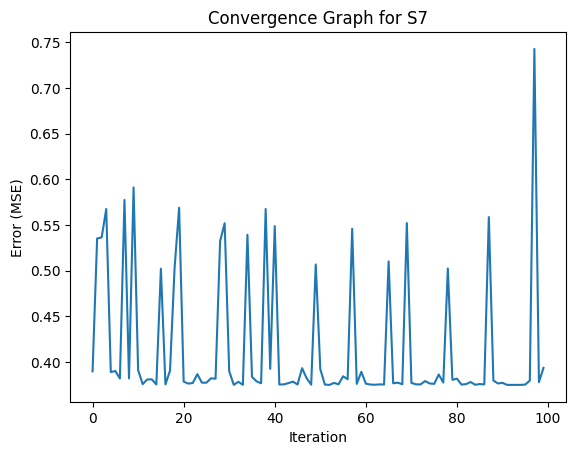

Results saved to 'svm_results.csv'.


In [18]:
if __name__ == "__main__":
    # Load and preprocess dataset
    data = load_dataset()
    print("Dataset loaded successfully.")

    # Create 10 samples
    samples = create_samples(data)
    print("Samples created successfully.")

    # Optimize SVM for all samples
    results, best_sample, best_study = optimize_all_samples(samples)
    print("Optimization completed.")
    print("Results:")
    for res in results:
        print(res)

    # Plot convergence graph for the best sample
    plot_convergence(best_study, best_sample)

    # Save results to file
    save_results(results)